## Install Packages and Libraries

In [ ]:
# %pip install yfinance

In [ ]:
# %pip install pathlib
# %pip install ruamel-yaml

In [22]:
from pair_trading_foundations.utils import GetSP500Data
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import coint
import warnings
# The yfinance module has some deprecation warning
warnings.filterwarnings('ignore')

## Load and Explore Data

In [23]:
row_data = GetSP500Data('2010-01-01','2023-12-31').get_all_sp_tickers().get_consolidated_data();

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [24]:
row_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS Sector,GICS Sub-Industry
0,2010-01-04,83.089996,83.449997,82.669998,83.019997,53.295380,3043700.0,MMM,Industrials,Industrial Conglomerates
1,2010-01-05,82.800003,83.230003,81.699997,82.500000,52.961582,2847000.0,MMM,Industrials,Industrial Conglomerates
2,2010-01-06,83.879997,84.599998,83.510002,83.669998,53.712650,5268500.0,MMM,Industrials,Industrial Conglomerates
3,2010-01-07,83.320000,83.760002,82.120003,83.730003,53.751183,4470100.0,MMM,Industrials,Industrial Conglomerates
4,2010-01-08,83.690002,84.320000,83.300003,84.320000,54.129932,3405800.0,MMM,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...,...,...,...,...
1684604,2023-12-22,195.320007,195.910004,192.740005,194.979996,194.538773,1548400.0,ZTS,Health Care,Pharmaceuticals
1684605,2023-12-26,194.880005,196.339996,194.089996,195.500000,195.057587,814600.0,ZTS,Health Care,Pharmaceuticals
1684606,2023-12-27,195.410004,197.009995,194.740005,196.899994,196.454422,766400.0,ZTS,Health Care,Pharmaceuticals
1684607,2023-12-28,197.619995,198.600006,196.529999,197.160004,196.713837,880100.0,ZTS,Health Care,Pharmaceuticals


In [28]:
#remove data during covid period, ie, years 2020-01 : 2022-31

# Define the COVID time period- 3 years
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2022-12-31')

# Create a boolean mask for filtering
mask = (row_data['Date'] < covid_start_date) | (row_data['Date'] > covid_end_date)

all_data=row_data[mask]

In [29]:
# Load the df. Data is from 01/01/10 to 12/31/23. There are 1,328,730 rows of data
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS Sector,GICS Sub-Industry
0,2010-01-04,83.089996,83.449997,82.669998,83.019997,53.295380,3043700.0,MMM,Industrials,Industrial Conglomerates
1,2010-01-05,82.800003,83.230003,81.699997,82.500000,52.961582,2847000.0,MMM,Industrials,Industrial Conglomerates
2,2010-01-06,83.879997,84.599998,83.510002,83.669998,53.712650,5268500.0,MMM,Industrials,Industrial Conglomerates
3,2010-01-07,83.320000,83.760002,82.120003,83.730003,53.751183,4470100.0,MMM,Industrials,Industrial Conglomerates
4,2010-01-08,83.690002,84.320000,83.300003,84.320000,54.129932,3405800.0,MMM,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...,...,...,...,...
1684604,2023-12-22,195.320007,195.910004,192.740005,194.979996,194.538773,1548400.0,ZTS,Health Care,Pharmaceuticals
1684605,2023-12-26,194.880005,196.339996,194.089996,195.500000,195.057587,814600.0,ZTS,Health Care,Pharmaceuticals
1684606,2023-12-27,195.410004,197.009995,194.740005,196.899994,196.454422,766400.0,ZTS,Health Care,Pharmaceuticals
1684607,2023-12-28,197.619995,198.600006,196.529999,197.160004,196.713837,880100.0,ZTS,Health Care,Pharmaceuticals


In [31]:
all_data.to_csv('covid_filtered_010110_123123.csv', index=False)

In [32]:
df=pd.read_csv('covid_filtered_010110_123123.csv')

In [33]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS Sector,GICS Sub-Industry
0,2010-01-04,83.089996,83.449997,82.669998,83.019997,53.295380,3043700.0,MMM,Industrials,Industrial Conglomerates
1,2010-01-05,82.800003,83.230003,81.699997,82.500000,52.961582,2847000.0,MMM,Industrials,Industrial Conglomerates
2,2010-01-06,83.879997,84.599998,83.510002,83.669998,53.712650,5268500.0,MMM,Industrials,Industrial Conglomerates
3,2010-01-07,83.320000,83.760002,82.120003,83.730003,53.751183,4470100.0,MMM,Industrials,Industrial Conglomerates
4,2010-01-08,83.690002,84.320000,83.300003,84.320000,54.129932,3405800.0,MMM,Industrials,Industrial Conglomerates
...,...,...,...,...,...,...,...,...,...,...
1328725,2023-12-22,195.320007,195.910004,192.740005,194.979996,194.538773,1548400.0,ZTS,Health Care,Pharmaceuticals
1328726,2023-12-26,194.880005,196.339996,194.089996,195.500000,195.057587,814600.0,ZTS,Health Care,Pharmaceuticals
1328727,2023-12-27,195.410004,197.009995,194.740005,196.899994,196.454422,766400.0,ZTS,Health Care,Pharmaceuticals
1328728,2023-12-28,197.619995,198.600006,196.529999,197.160004,196.713837,880100.0,ZTS,Health Care,Pharmaceuticals


In [34]:
# View the data types and non-null values in the dataset. 
# All colomns returning 10020 Non-Null so there is no null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328730 entries, 0 to 1328729
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Date               1328730 non-null  object 
 1   Open               1328730 non-null  float64
 2   High               1328730 non-null  float64
 3   Low                1328730 non-null  float64
 4   Close              1328730 non-null  float64
 5   Adj Close          1328730 non-null  float64
 6   Volume             1328730 non-null  float64
 7   Ticker             1328730 non-null  object 
 8   GICS Sector        1328730 non-null  object 
 9   GICS Sub-Industry  1328730 non-null  object 
dtypes: float64(6), object(4)
memory usage: 101.4+ MB


In [35]:
#check if there is duplicated rows
# returning false, so there arn't any duplications
print(df.duplicated().any())

False


In [36]:
# view all tickers
unique_tickers = df['Ticker'].unique()
unique_tickers

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP',
       'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI',
       'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM',
       'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
       'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX',
       'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA',
       'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'CDNS',
       'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT',
       'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF',
       'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI',
       'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO',
       'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG',
     

In [38]:
# count how many tickers
print("Number of unique values:", len(unique_tickers))

Number of unique values: 501


## Data Visualization

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=all_data['Date'],
                open=all_data['Open'],
                high=all_data['High'],
                low=all_data['Low'],
                close=all_data['Close'])])

fig.update_layout(title='Candlestick Chart For All Tickers In SP500', title_x=0.5, xaxis_title='Date', yaxis_title='Price')
fig.show()

In [ ]:
all_data['SMA_7'] = all_data['Close'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(all_data['Date'], all_data['Close'], label='Closing Price')
plt.plot(all_data['Date'], all_data['SMA_7'], label='7-day SMA', linestyle='--')
plt.title('Stock Price with 7-day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Probable pair trade option : Apple (AAPL) and  Tesla (TSLA) performance in December 2023

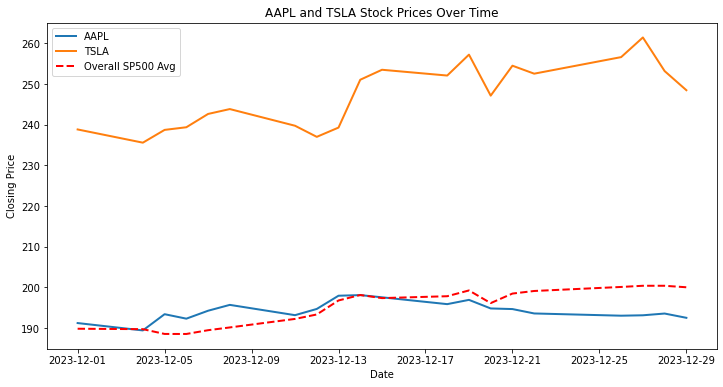

In [60]:
plt.figure(figsize=(12, 6))

# Filter data for AAPL
aapl_data = all_data[all_data['Ticker'] == 'AAPL']
plt.plot(aapl_data['Date'], aapl_data['Close'], label='AAPL', linewidth=2)

# Filter data for TSLA
tsla_data = all_data[all_data['Ticker'] == 'TSLA']
plt.plot(tsla_data['Date'], tsla_data['Close'], label='TSLA', linewidth=2)

# Calculate overall performance (average closing price)
overall_performance = all_data.groupby('Date')['Close'].mean()
plt.plot(overall_performance.index, overall_performance.values, '--r', label='Overall SP500 Avg', linewidth=2)


plt.title('AAPL and TSLA Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [75]:
# Create candlestick charts
fig = go.Figure()

# Add AAPL candlestick trace
fig.add_trace(go.Candlestick(x=aapl_data['Date'],
                open=aapl_data['Open'],
                high=aapl_data['High'],
                low=aapl_data['Low'],
                close=aapl_data['Close'],
                name='AAPL',
                increasing=dict(line=dict(color='green')),
                decreasing=dict(line=dict(color='red'))))             
                             

# Add TSLA candlestick trace
fig.add_trace(go.Candlestick(x=tsla_data['Date'],
                open=tsla_data['Open'],
                high=tsla_data['High'],
                low=tsla_data['Low'],
                close=tsla_data['Close'],
                name='TSLA',
                increasing=dict(line=dict(color='blue')),
                decreasing=dict(line=dict(color='orange'))))

# Update layout
fig.update_layout(title='Daily Candlestick Chart for AAPL and TSLA',
                  title_x=0.5,
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=True)

# Show the plot
fig.show()

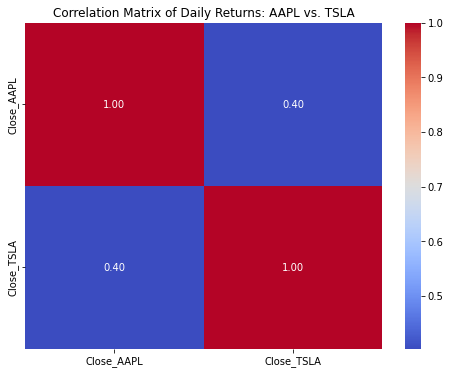

In [65]:
# Correlation Analysis: correlation between the daily returns of AAPL and TSLA to understand their statistical relationship
merged_data = pd.merge(aapl_data, tsla_data, on='Date', suffixes=('_AAPL', '_TSLA'))
correlation_matrix = merged_data[['Close_AAPL', 'Close_TSLA']].pct_change().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns: AAPL vs. TSLA')
plt.show()

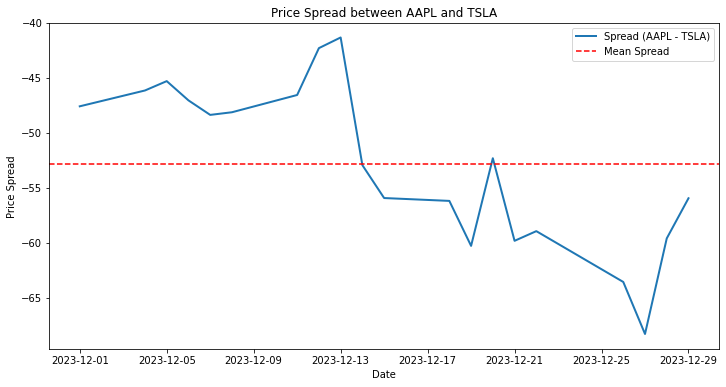

In [67]:
#Price Spread Analysis:price spread between AAPL and TSLA, which is the difference in their closing prices
# Merge data on common dates
merged_data = pd.merge(aapl_data, tsla_data, on='Date', suffixes=('_AAPL', '_TSLA'))

# Calculate the spread
spread = merged_data['Close_AAPL'] - merged_data['Close_TSLA']

# Plot the spread
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], spread, label='Spread (AAPL - TSLA)', linewidth=2)
plt.axhline(y=spread.mean(), color='r', linestyle='--', label='Mean Spread')
plt.title('Price Spread between AAPL and TSLA')
plt.xlabel('Date')
plt.ylabel('Price Spread')
plt.legend()
plt.show()

In [70]:
# Cointegration Test:cointegration test to assess the long-term relationship between AAPL and TSLA prices
_, p_value, _ = coint(aapl_data['Close'], tsla_data['Close'])
print(f'Cointegration p-value: {p_value}')

Cointegration p-value: 0.9859002580259643
